# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import seaborn as sns
from matplotlib import rcParams
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')
clean_hospital_read_df=clean_hospital_read_df.reindex()

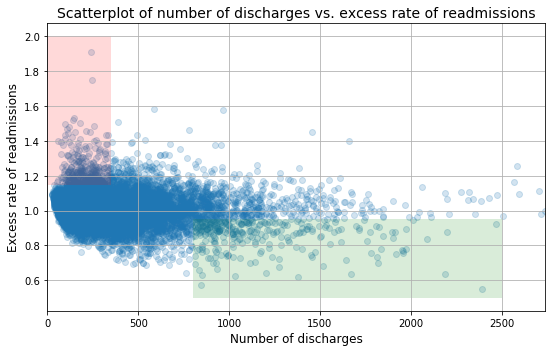

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### Data Cleaning

In [5]:
clean_hospital_read_df = clean_hospital_read_df.dropna(subset=['Number of Readmissions'])
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 12 columns):
Hospital Name                 11497 non-null object
Provider Number               11497 non-null int64
State                         11497 non-null object
Measure Name                  11497 non-null object
Number of Discharges          11497 non-null int64
Footnote                      0 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11497 non-null object
End Date                      11497 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


### 2.) Do you agree with the above analysis and recommendations? Why or why not?


I do not agree with the analysis that the overall rate of readmissions is trending down with an increasing number of discharges. There must be a quantitative value for the correlation of the rate of readmissions with the number of discharges that shows there is a negative correlation between the two variables in order to claim there is a negative correlation. If there is a negative correlation, I agree with the recommendations that hospitals with smaller capacities should prove upgraded resource allocation for quality care and consolidation of hospitals should occur so that there are smaller number of them higher capacity and number of discharges.

In order to determine whether hospitals with lower discharges have a higher readmission rate than hopsitals with more discharges, a 2 sample T-test needs to be done to compare the means of hospitals with more than 300 discharges and hospitals with less than 300 discharges.

### 1.) Setup an appropriate hypothesis test.

Null Hypothesis: There is a negative correlation between number of discharges and the overall rate of readmissions. 

Alternative Hypothesis: There is a non-negative correlation between the number of dicharges and the overall rate of readmissions.

Test Statistic: The pearson correlation coefficient ρ, this represents the correlation between the two variables.

#### Permutation Test

#### Compute and report the observed significance value (or p-value).

In [6]:
# Define a function for calculating the pearson correlation, ρ
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    corr_mat = np.corrcoef(x, y)
    return corr_mat[0,1]

p_obs = pearson_r(x, y)
print('Pearson Correlation Coefficient: ' + str(p_obs))

Pearson Correlation Coefficient: -0.09309554287590442


In [7]:
#Permutation Test
perm_replicates = np.empty(10000)

for i in range(10000):
    x_permuted = np.random.permutation(x)
    perm_replicates[i] = pearson_r(x_permuted, y)

p = np.sum(perm_replicates < 0) / len(perm_replicates)
print('p-value: ', p)

p-value:  0.4998


In [8]:
significance = 0.01
if p < significance:
    print('p-value is less than 0.01.')
else:
    print('p-value is greater than or equal to 0.01.')

p-value is greater than or equal to 0.01.


#### Summary of Hypothesis Test

1.) The pearson correlation coefficient found for the data was negative at a value of -0.093.  The coefficient's value is very close to zero which means the negative correlation is very weak.

2.) The hypothesis test resulted in a p-value that is greater than 0.01.  This means we fail to reject the null hypothesis, and can say that there is a significant negative correlation between the number of discharges and the overall excess readmission rate. 

#### Pearson Coefficient and p-value from scipy.stats

Null Hypothesis: There is no correlation between number of discharges and rate of excess re-admission.

Alternate hypothesis: there is a correlation between the number of discharges and rate of excess re-admission.

Test Statistic: Pearson correlation coefficient, ρ, between number of discharges & excess rate of readmissions.

In [9]:
from scipy.stats import pearsonr
correlation, p = pearsonr(x, y)
print('correlation: ', correlation)
print('p-value: ', p)

correlation:  -0.09309554287590441
p-value:  1.5022756426464526e-23


In [10]:
alpha = 0.01
if p < alpha:
    print('p-value is less than 0.01.')
else:
    print('p-value is greater than or equal to 0.01.')


p-value is less than 0.01.


#### Summary of Hypothesis Test

The pearson correlation coefficient was found to be -0.093. This means there is a weak negative correlation between number of discharges and rate of excess readmission.

The corresponding p-value for this correlation coefficient was less than 0.01.  This means that we can reject the null hypothesis that there is no correlation between the number of discharges and rate of excess readmission. 

### 3.) Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

#### Statistics

In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1.
In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1.

These statistics do not help us with determining whether the recommendation that hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.


In [12]:
#### T-test

discharge_less_than_300 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']<300]
mu1=discharge_less_than_300['Excess Readmission Ratio'].mean()
discharge_greater_than_300 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']>300]
mu2=discharge_greater_than_300['Excess Readmission Ratio'].mean()
s1=discharge_less_than_300['Excess Readmission Ratio'].std()
s2=discharge_greater_than_300['Excess Readmission Ratio'].std()
n1=len(discharge_less_than_300)
n2=len(discharge_greater_than_300)


two_group_test=(mu1-mu2)/(np.sqrt(((s1**2)/n1)+((s2**2)/n2)))
print('Mean readmission rate for hospitals with discharge less than 300: ' + str(mu1))
print('Mean readmission rate for hospitals with discharge more than 300: ' + str(mu2))
print('T-test value: ' + str(round(two_group_test, 6)))
print('P-value for T-test: 1.04e-16')

import scipy.stats as stats
sample1 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']<300]['Excess Readmission Ratio'].tolist()
sample2 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']>300]['Excess Readmission Ratio'].tolist()
t_stat, p_val = stats.ttest_ind(sample1, sample2, equal_var=False)


group1=(n1-1)*s1**2
group2=(n2-1)*s2**2

effect_size=(mu1-mu2)/(np.sqrt((group1+group2)/(n1+n2-1)))
print('Effect Size: ' + str(round(effect_size, 2)))




Mean readmission rate for hospitals with discharge less than 300: 1.0142382121807445
Mean readmission rate for hospitals with discharge more than 300: 0.9997810438024227
T-test value: 8.313708
P-value for T-test: 1.04e-16
Effect Size: 0.16


A statistically significant value is defined as a result that is very unlikely to have happened under the null hypothesis. The practical significance on the other hand refers to the magnitude of difference also known as the effect size.  The practical significance determines if the result is meaningful in real life.

We are comparing two groups of hospitals, hospitals with a discharge count less than 300 and hospitals with discharge count greater than 300.  The two sample hypothesis test determined that the difference in mean rate of excess readmission for the two groups of hopsitals were statistically significant.  The null hypothesis is that there is no difference in means of excess readmission rate while the alternative hypothesis is that there is a significant difference.  With a p-value for the t-test less than 0.01, we can state there is a significant difference between the means of the two groups.   

The difference in means is also practically significant because the effect size was 0.16 which means there is at least a small sized difference between the means. 

The practical significance of the difference of means appears to confirm that the difference of means of the two groups are statistically significant.  

Because we know the difference in means of excess readmission rate are both statistically and practically significant and that larger hospitals have a lower excess readmission rate, consolidation of hospitals and distribution of resources should go to smaller hospitals which clearly have a higher excess readmission rate.  



#### Recommendations

The p-value for the two sample t-test was smaller than 0.01 which means the null hypothesis that there is not a significant difference in mean excess readmission rate between hopsitals with less than 300 and more than 300 discharges can be rejected.  

The recommendation is to improve resource allocation and resources at discharge counts less than 300 because the excess readmission rate for these hopsitals is higher than hospitals with more discharges.  Better resources will potentially lead to more discharges and therefore a lower excess readmission rate because better resources means  possibly better treatment.

### 4.) Look at the scatterplot from the preliminary analysis.

#### What are the advantages and disadvantages of using this plot to convey information?

The advantage of the scatter plot is that it visualizes the two variables on the same axis but it does not clearly establish that a trend is present between the two variables.  We need a graph that more clearly establishes a correlation between the two variables.


#### Construct another plot that conveys the same information in a more direct manner.

Bar plots will be made to convey the same information but this time the negative correlation between number of discharges and rate of excess readmissions will be more visible. 




In [ ]:
pct = np.percentile(sorted(clean_hospital_read_df['Number of Discharges']), range(5, 105, 5))
pct[1]

In [ ]:
for i in range(len(pct)):
    j=i-1
    print(i)
    for index,row in clean_hospital_read_df.iterrows():
        if i>=1:
            if (row['Number of Discharges']<=(int(pct[i]))) & (row['Number of Discharges']>(int(pct[j]))) :
                clean_hospital_read_df.loc[index, 'Excess Readmission Ratio 5%']=row['Excess Readmission Ratio']
                clean_hospital_read_df.loc[index, 'Discharge Percentile Group']=i

        if i==0:
            if (row['Number of Discharges']<=(int(pct[i]))):
                clean_hospital_read_df.loc[index, 'Excess Readmission Ratio 5%']=row['Excess Readmission Ratio']
                clean_hospital_read_df.loc[index, 'Discharge Percentile Group']=i

In [31]:
clean_hospital_read=clean_hospital_read_df.groupby('Discharge Percentile Group')['Excess Readmission Ratio 5%'].mean().to_frame()
clean_hospital_read=clean_hospital_read.rename(index=str, columns={"Excess Readmission Ratio 5%": "Excess Readmission Ratio", "Discharge Percentile Group": "Number of Discharges Grouped"})
clean_hospital_read=clean_hospital_read.reset_index()
clean_hospital_read['Discharge Percentile Group'] = clean_hospital_read['Discharge Percentile Group'].astype(float)
clean_hospital_read = clean_hospital_read.sort_values(['Discharge Percentile Group'])
clean_hospital_read

,Discharge Percentile Group,Excess Readmission Ratio
0,0.0,1.034201
1,1.0,1.011915
2,2.0,1.008802
3,3.0,1.011591
4,4.0,1.013414
5,5.0,1.015068
6,6.0,1.006849
7,7.0,1.014619
8,8.0,1.018226
9,9.0,1.011750


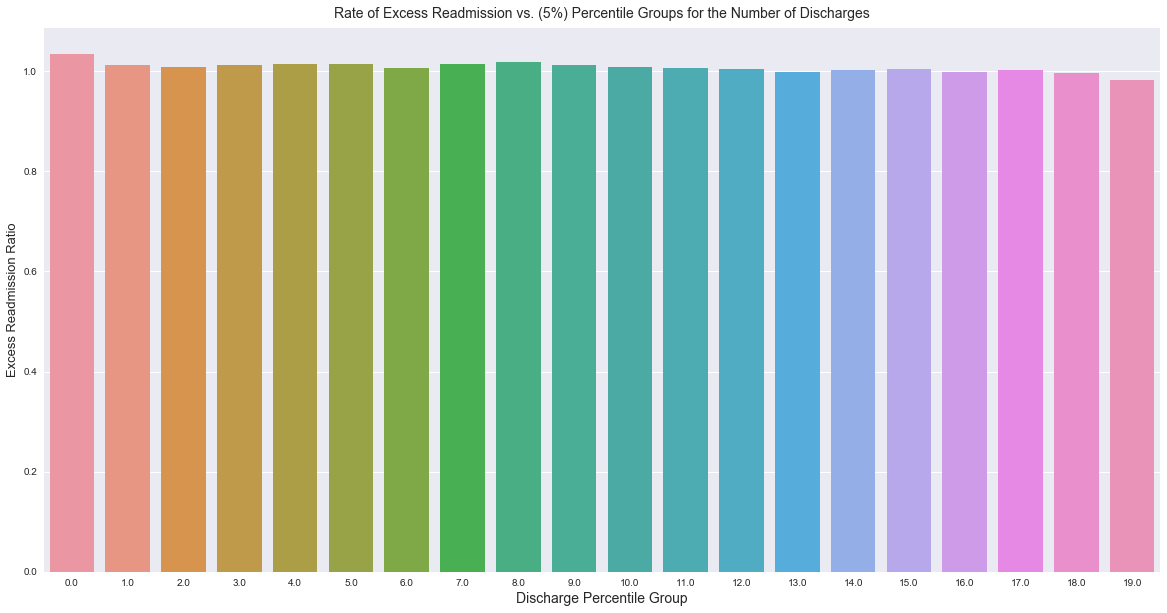

In [32]:
ax=sns.barplot(x = 'Discharge Percentile Group', y = 'Excess Readmission Ratio', data = clean_hospital_read)
sns.set(rc={'figure.figsize':(20, 10)})
ax.set_title('Rate of Excess Readmission vs. (5%) Percentile Groups for the Number of Discharges', fontsize=14)
ax.set_xlabel(ax.get_xlabel(), fontsize = 14)
ax.set_ylabel(ax.get_ylabel(), fontsize = 13)
rcParams['axes.titlepad'] = 10

The number of discharges are grouped in the barplot above by percentiles.  The numbered percentiles represent 5% of the number of discharges in increasing order.  For example, the 0th percentile group represents the bottom 5% of the spectrum for the number of discharges.  

From the barplot above, we can see that as the number of discharges increase, the mean rate of excess readmission decreases.  The height of each bar tends to get smaller as the number discharges increases. 

#### Conclusions

I do agree with the statistical analysis in the preliminary report.  There is a significant correlation between the number of discharges and readmission rate as stated in the report.  The pearson correlation coefficient for the relationship of the two variables reflects a very weak correlation at a value of -0.09.  This pearson correlation coefficient establishes a weak but significant correlation because the p-value was less than 0.01.  

I do agree with the observation that the report made which is that smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions. Smaller hospitals are lacking necessary resources and as they recieve more resources, smaller hospitals will have their discharge number increase presumably, and this will lead to a lower excess readmission rate as seen by the hypothesis test done above which shows a higher excess readmission rate when number of discharges is less than 300.  

I do agree with the statement that hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation because the difference in means of the excess readmission rate between hopsitals with less than 300 and more than 300 discharges is statistically significant.  This means as a hospital reallocates resources to quality care, the number of discharges should go down which means the excess readmission rate will go down.  Also, the recommendation that directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges might not work for smaller hopstials because smaller hospitals are generally more spread out geographically and it does not make logistical sense to combine facilities just to increase the number of discharges.

Resource reallocation should occur with smaller hospitals with a discharge number less than 300.  Improvements in hopsital resources and allocation should improve the discharge count and has been shown to have a weak negative correlation with excess readmission rate so the improvements should benefit smaller hospitals.  